In [1]:
import numpy as np

In [8]:
x = np.linspace(0,10,4)

In [9]:
x

array([ 0.        ,  3.33333333,  6.66666667, 10.        ])

In [11]:
y = x*x*np.exp(-x)

In [14]:
# Composite Simpson's 1/3rd Rule
(h/3)*(y[0] + 4 * y[1] + 2 * y[2] + 4 * y[3] + y[4])

1.1380230065706338

In [15]:
y

array([0.        , 0.3963777 , 0.0565615 , 0.00453999])

In [16]:
y[1:-1]

array([0.3963777, 0.0565615])

In [7]:
def func(x):
    return x*x*np.exp(-x)

In [17]:
def trapez(f, a, b, n):
    h = (b - a)/n
    x = np.linspace(a,b,n)
    y = func(x)
    return (h/2)*(y[0] + 2*y[1:-1].sum() + y[-1])

In [26]:
trapez(func, 0, 10, 10) - 1.99446

-0.21015731176537367

In [27]:
trapez(func, 0, 10, 20) - 1.99446

-0.10039560111342238

In [29]:
(trapez(func, 0, 10, 20) - 1.99446) / (trapez(func, 0, 10, 10) - 1.99446)

0.477716431896061

In [50]:
def simps3(f, a, b, n):
    h = (b - a)/n
    x = np.linspace(a,b,n)
    y = func(x)
    return (h/3)*(y[0] + y[1::2].sum()*4 + y[2:-1:2].sum()*2 + y[-1])

In [32]:
x = np.linspace(1,11,11)

In [33]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [36]:
#x[start:stop:step]
x[1::2]

array([ 2.,  4.,  6.,  8., 10.])

In [39]:
x[2:-1:2]

array([3., 5., 7., 9.])

In [45]:
trapez(func, 0, 10, 11) - 1.99446

-0.18859074536125586

In [46]:
simps3(func, 0, 10, 11) - 1.99446

-0.16079556242111193

In [47]:
(simps3(func, 0, 10, 11) - 1.99446) / (simps3(func, 0, 10, 21) - 1.99446)

1.7257161798268406

In [51]:
(simps3(func, 0, 10, 101) - 1.99446) / (simps3(func, 0, 10, 201) - 1.99446)

1.98992992656734

In [60]:
# Generate interpolating polynomial using Lagrangian polynomial
x = np.linspace(0,10,5)

In [61]:
y = np.random.random(5)

In [54]:
y

array([0.8606087 , 0.71910688, 0.28611457])

In [55]:
x

array([ 0.,  5., 10.])

In [56]:
import matplotlib.pyplot as plt

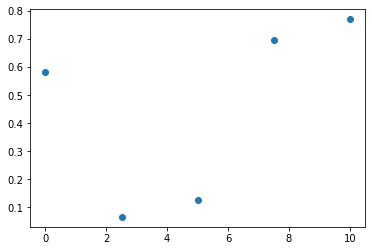

In [62]:
plt.plot(x, y, 'o')

In [63]:
from numpy import poly1d

In [64]:
p = poly1d([3,4,5])

In [66]:
print(p)

   2
3 x + 4 x + 5


In [67]:
print(p*p)

   4      3      2
9 x + 24 x + 46 x + 40 x + 25


In [68]:
from scipy.integrate import quad

In [70]:
def func(x, a):
    return x*x*np.exp(-a*x)

In [74]:
I = quad(func, 0, 10, args=(1))

In [75]:
I

(1.994461208568977, 8.43652381214296e-11)

In [76]:
I = quad(func, 0, np.inf, args=(1))

In [77]:
I

(2.0, 1.045424186015711e-10)

In [78]:
from scipy.integrate import simps

In [79]:
help(simps)

Help on function simps in module scipy.integrate._quadrature:

simps(y, x=None, dx=1, axis=-1, even='avg')
    Integrate y(x) using samples along the given axis and the composite
    Simpson's rule. If x is None, spacing of dx is assumed.
    
    If there are an even number of samples, N, then there are an odd
    number of intervals (N-1), but Simpson's rule requires an even number
    of intervals. The parameter 'even' controls how this is handled.
    
    Parameters
    ----------
    y : array_like
        Array to be integrated.
    x : array_like, optional
        If given, the points at which `y` is sampled.
    dx : int, optional
        Spacing of integration points along axis of `x`. Only used when
        `x` is None. Default is 1.
    axis : int, optional
        Axis along which to integrate. Default is the last axis.
    even : str {'avg', 'first', 'last'}, optional
        'avg' : Average two results:1) use the first N-2 intervals with
                  a trapezoidal r